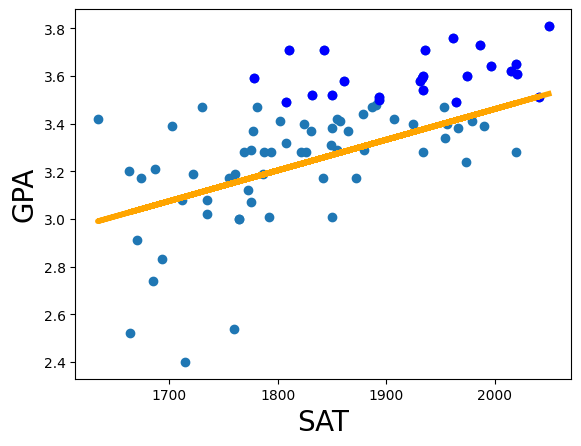

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Change to data path on your computer
data = pd.read_csv("ex2Data/SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = np.array(data['GPA']).reshape(-1, 1)
x = np.array(data['SAT']).reshape(-1, 1)

regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=60, shuffle=False)
model = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
yhat = regr.intercept_ + x * regr.coef_
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x, y)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#lấy dữ liệu từ file (lưu ý: Header = 0 nghĩa là lấy dòng đầu tiên làm tên cột)
data = pd.read_csv('ex2Data/vidu4_lin_reg.txt', sep=" ", header=0)
print(data)
regr = linear_model.LinearRegression()
#x là dữ liệu 5 cột bỏ cột đầu, y là dữ liệu cột cuối
y_data = data.iloc[:, -1]
x_data = data.iloc[:, 1:6]

     ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0     1    56   21  160     14.0         6.00      1.95
1     2    76   18  150     12.0         4.97      1.33
2     3    63   16  160      4.4         6.39      0.83
3     4    78   20  100      4.0         7.00      2.00
4     5    87   20  110      4.6         4.10      1.30
..  ...   ...  ...  ...      ...          ...       ...
95   96    55   24  160      5.0         7.20      0.90
96   97    76   15  140      3.1         5.24      1.16
97   98    70   25  180      4.0         4.40      1.00
98   99    85   21  160      5.2         5.20      0.97
99  100    87   22  130      9.0         5.20      2.30

[100 rows x 7 columns]


In [3]:
#in thử xem đã lấy dữ liệu đúng chưa
print(x_data)
print(y_data)

    TUOI  BMI   HA  GLUCOSE  CHOLESTEROL
0     56   21  160     14.0         6.00
1     76   18  150     12.0         4.97
2     63   16  160      4.4         6.39
3     78   20  100      4.0         7.00
4     87   20  110      4.6         4.10
..   ...  ...  ...      ...          ...
95    55   24  160      5.0         7.20
96    76   15  140      3.1         5.24
97    70   25  180      4.0         4.40
98    85   21  160      5.2         5.20
99    87   22  130      9.0         5.20

[100 rows x 5 columns]
0     1.95
1     1.33
2     0.83
3     2.00
4     1.30
      ... 
95    0.90
96    1.16
97    1.00
98    0.97
99    2.30
Name: BEDAYNTM, Length: 100, dtype: float64


In [4]:
#Train với toàn bộ 100 dữ liệu
regr.fit(x_data, y_data)
res = list(zip(x_data.columns.tolist(), regr.coef_))
#in ra các chỉ số
for o in res:
    print("{: >20}: {: >10}".format(*o))

                TUOI: 0.009946940947109854
                 BMI: -0.00020654770133401133
                  HA: 0.0021813669452475076
             GLUCOSE: 0.007670101694230014
         CHOLESTEROL: 0.03847024823970344


In [5]:
#tách dữ liệu vs tỉ lệ 8:2 trong đó 80 bộ dữ liệu đầu dùng để training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, shuffle=False)
regr.fit(x_train, y_train)
#in lại các giá trị sau khi train
res = list(zip(x_data.columns.tolist(), regr.coef_))
#in ra các chỉ số
for o in res:
    print("{: >20}: {: >10}".format(*o))
y_pred = regr.predict(x_test)
print("Kỳ vọng của sai số là: " , mean_absolute_error(y_pred, y_test))
print("Phương sai của sai số là: " ,mean_squared_error(y_pred, y_test))

                TUOI: 0.008989196889296783
                 BMI: -0.00047742422185274966
                  HA: 0.0026021798675557725
             GLUCOSE: 0.008086342231978154
         CHOLESTEROL: 0.007085352341923775
Kỳ vọng của sai số là:  0.30532598337436595
Phương sai của sai số là:  0.22740099167615907


In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

#import dữ liệu
data = pd.read_csv("ex2Data/real_estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [7]:
#tách dữ liệu
y_data = data.iloc[:, -1]
x_data = data.iloc[:, 1:7]
#lấy phần nguyên của năm giao dịch
x_data['X1 transaction date'] = data['X1 transaction date'].apply(int)
lregr = linear_model.LinearRegression()
#chia dữ liệu thành bộ training và validation
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=350, shuffle=False)
lregr.fit(x_train, y_train)
#dự đoán
y_pred = lregr.predict(x_test)
sse = ((y_test - y_pred) ** 2).sum()
print('Tổng bình phương sai số của dự đoán:', sse)

Tổng bình phương sai số của dự đoán: 4083.6448394273953
